In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')

In [3]:
df.head()
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [4]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


# Preparing the data

In [7]:
df['ex_showroom_price'].isnull().sum()

435

In [8]:
#Fill missing ex_showroom_price with median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace = True)

In [9]:
df['ex_showroom_price'].isnull().sum()

0

In [10]:
#Checking for missing values
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [11]:
#Checking if there are duplicate rows
df.duplicated().sum()

6

In [12]:
#Removing duplicate rows
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,72752.5


**1. What is the range of selling prices in the dataset?**

Ans:- 

In [17]:
# Finding the minimum value of Selling price
min_selling_price = df['selling_price'].min()
max_selling_price = df['selling_price'].max()
print(min_selling_price)
print(max_selling_price)

5000
760000


In [18]:
range_of_selling_prices = max_selling_price - min_selling_price

In [19]:
range_of_selling_prices

755000

**2. What is the median selling price for bikes in the dataset?**

Ans:-

In [22]:
median_selling_price = df['selling_price'].median()

In [23]:
median_selling_price

45000.0

**3.  What is the most common seller type?**

Ans :-

In [26]:
most_common_seller_type = df['seller_type'].value_counts()

In [27]:
most_common_seller_type

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

So the most common seller type is "Individual(1049)" seller_type.

**4. How many bikes have driven more than 50,000 kilometers?**

Ans :-

In [31]:
bikes_driven_more_than_50000_kilometers = df[df['km_driven'] > 50000].shape[0] #filtering the column

In [32]:
bikes_driven_more_than_50000_kilometers

168

So, 168 bike have driven more than 50,000 kilometers.

**5.  What is the average km_driven value for each ownership type?**

Ans:-

- We need to:
    - Group the data by 'owner'
    - For each group, calculate the average of 'km_driven'

In [37]:
average_km_driven_value_for_each_ownership_type = df.groupby('owner')['km_driven'].mean()

In [38]:
print(average_km_driven_value_for_each_ownership_type)

owner
1st owner     32732.710240
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**6. What proportion of bikes are from the year 2015 or older?**

Ans :-

In [41]:
bikes_2015_or_older_count = df[df['year'] <= 2015].shape[0]
bikes_2015_or_older_count

597

In [42]:
total_bikes_count = df.shape[0]
total_bikes_count

1055

In [43]:
proportion_bikes_2025_or_older = (bikes_2015_or_older_count / total_bikes_count * 100)
proportion_bikes_2025_or_older

56.58767772511848

In [44]:
print(f"proportion_bikes_2025_or_older: {proportion_bikes_2025_or_older:.2f}%")

proportion_bikes_2025_or_older: 56.59%


So, proportion of bikes are from the year 2015 or older is 56.59%.

**7. What is the trend of missing values across the dataset?**

In [47]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

There are no missing values in the dataset. All columns are complete and clean, so no imputation or data cleaning is required for null values.

**8. What is the highest ex_showroom_price recorded, and for which bike?**

In [50]:
df['ex_showroom_price'].max()

1278000.0

In [51]:
df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


So,  "1278000" is the highest ex_showroom_price recorded and for "Harley-Davidson Street Bob" bike.

**9. What is the total number of bikes listed by each seller type?**

Ans :- 

In [55]:
df['seller_type'].value_counts()

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

- So, We have total two seller_type :
    -  "Individual" has 1,049 total number of bikes listed.
    -  "Dealer" has 6 total number of bikes listed.

**10. What is the relationship between selling_price and km_driven for first-owner bikes?**

Ans:-

In [59]:
first_owner_df = df[df['owner'] == '1st owner' ]

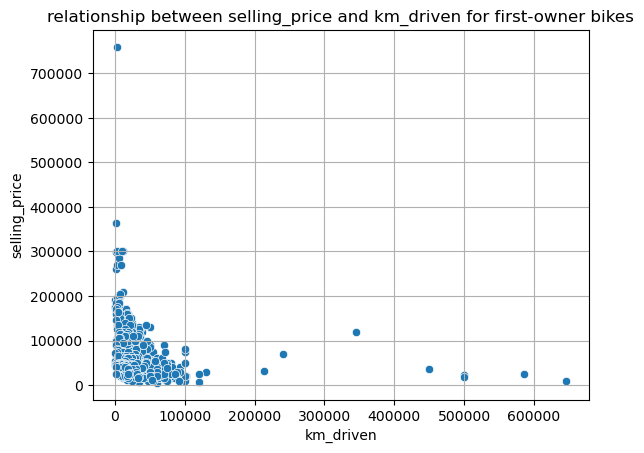

In [60]:
sns.scatterplot(data=first_owner_df, x = 'km_driven', y = 'selling_price')
plt.title('relationship between selling_price and km_driven for first-owner bikes')
plt.grid()
plt.show()

The relationship between selling_price and km_driven - 
> Bikes with lower kilometers driven tend to have higher selling prices, showing buyers prefer less-used vehicles.

**11.  Identify and remove outliers in the km_driven column using the IQR method.**

In [63]:
#detecting the outliers

#Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detect outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

#View outlier rows
print(outliers.shape[0])
# print(outliers[['km_driven']])

38


In [64]:
#Removing the outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [65]:
print('Original data shape', df.shape)
print('Cleaned data shape', df_cleaned.shape)

Original data shape (1055, 7)
Cleaned data shape (1017, 7)


**12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.**

Ans:-

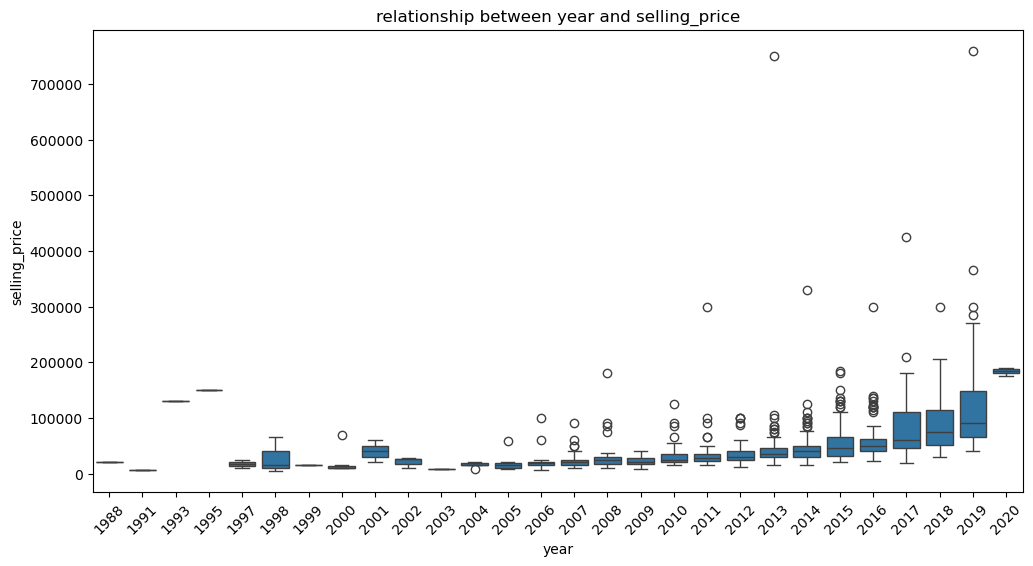

In [68]:
year_and_selling_price = df[['year', 'selling_price']]

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'year', y = 'selling_price', data = df)
plt.xticks(rotation = 45)
plt.title('relationship between year and selling_price')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()

Insights -

The box plot shows that selling_price increases with newer bike years.
Bikes made before 2005 have low and consistent prices, while those from 2015 onward show a wide range and higher medians.
Outliers are common in recent years, possibly due to high-end models or data anomalies.
Overall, there is a positive relationship between bike year and selling_price.

**13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing 
year).**

In [74]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [115]:
#calculating bike age
current_year = datetime.now().year
df['bike_age'] = current_year - df['year']

In [125]:
#grouping data by bike_age and finding the average of selling price
grouped_df = df.groupby('bike_age')['selling_price'].mean().reset_index()

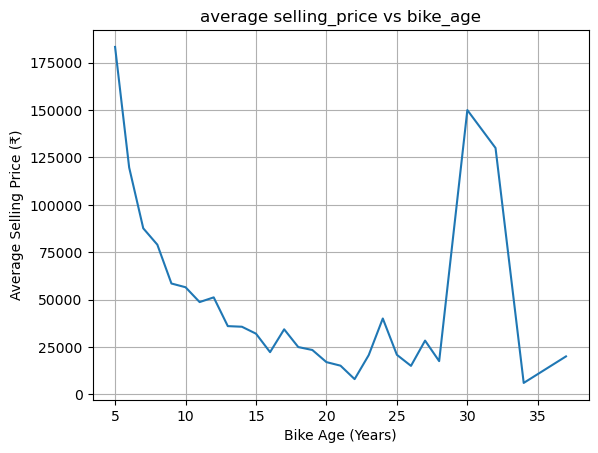

In [137]:
#ploting bike_age and average selling_price
sns.lineplot(x = 'bike_age', y = 'selling_price', data = grouped_df)
plt.title('average selling_price vs bike_age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price (₹)')
plt.grid()
plt.show()

In [143]:
grouped_df['Depreciation'] = grouped_df['selling_price'].diff(periods = -1) # next year - current year

In [152]:
average_depreciation = grouped_df['Depreciation'].mean()
print(f"Average Depreciation per Year = ₹{average_depreciation:.2f}")

Average Depreciation per Year = ₹6049.38


So, The average depreciation in selling price based on the bike's age (current year - manufacturing year) is ₹6049.38.

**14. Which bike names are priced significantly above the average price for their manufacturing year?**

Ans - So, 232 bikes are priced significantly above the average price for their manufacturing year.

In [156]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'bike_age'],
      dtype='object')

In [180]:
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.rename(columns = {'selling_price':'yearly_avg_price'}, inplace = True)

In [184]:
df = df.merge(avg_price_by_year, on='year')

In [192]:
df['price_difference'] = df['selling_price'] - df['yearly_avg_price']

In [199]:
df_above_avg = df[df['price_difference'] > 0.2 * df['yearly_avg_price']]

In [209]:
df_above_avg[['name', 'year', 'selling_price', 'yearly_avg_price']]

,name,year,selling_price,yearly_avg_price
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87603.915385
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
17,Yamaha YZF R15 S,2010,40000,31993.220339
...,...,...,...,...
978,Royal Enfield Classic 500,2014,95000,48668.131868
979,Royal Enfield Classic 500,2011,90000,35655.721311
999,TVS Apache RTR 160,2014,60000,48668.131868
1002,Bajaj Pulsar 220 F,2012,52000,35976.637681


**15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

In [248]:
#only numeric columns
numeric_df = df.select_dtypes(include = 'number')

In [252]:
#correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

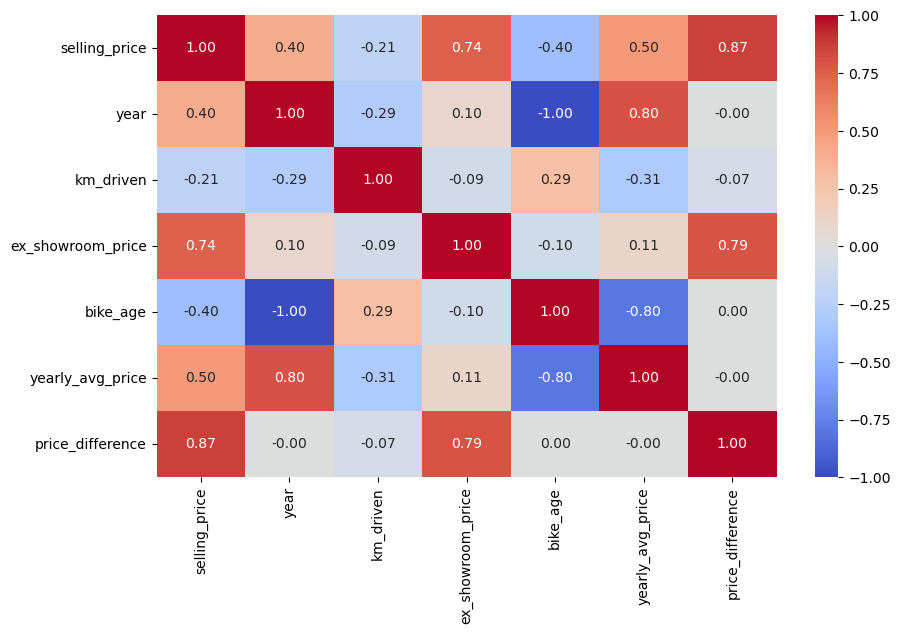

In [254]:
#Visualizing using heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation matrix')
plt.show()

From the correlation matrix, we observe that selling price is strongly influenced by:
- Ex-showroom price (0.74)
- Price difference from yearly average (0.87)

There's a strong negative correlation between bike age and both selling price (-0.40) and yearly average price (-0.80), confirming expected depreciation trends.

Surprisingly, kilometers driven shows very weak correlation with selling price (-0.21), indicating it may not be a significant factor in pricing in this dataset.